# analyzing low magnification data

This notebook shows some basic analyses of low magnification mesoscope data.

## setup plotting

In [1]:
import warnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    import matplotlib.pyplot as plt
%matplotlib inline

## import our packages

In [2]:
import thunder as td
from showit import image, tile

## load the data

In [3]:
data = td.images.fromtif('../data/lowmag/images/')

Inspect the data to see the `dtype` and `shape`. This is a reduced subset of the full data and has been downsampled in time.

In [4]:
data

Images
mode: local
dtype: uint8
shape: (50, 500, 468)

Look at the mean image.

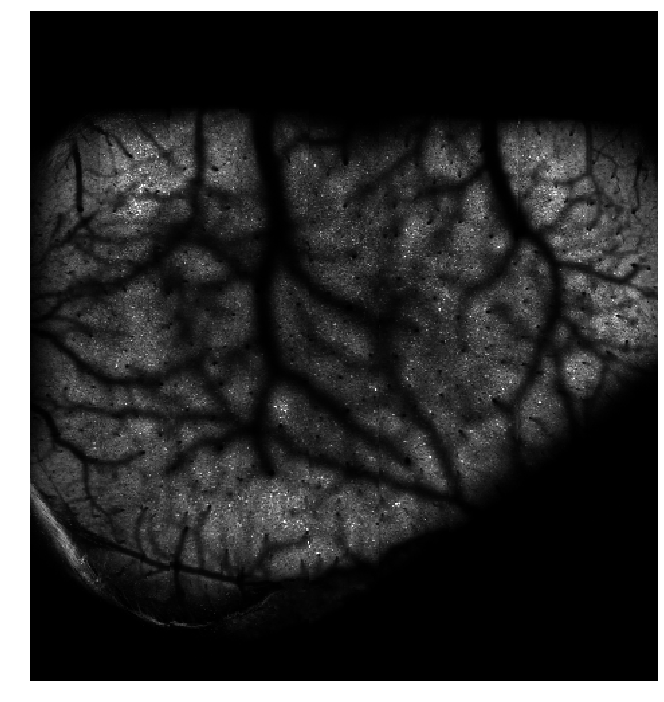

In [5]:
image(data.mean(), clim=(0, 160), size=12);

## average within subregions

Let's compute the average activity in a few subregions. First, load the regions from the `JSON` file.

In [6]:
from extraction import load
model = load('../data/lowmag/regions/regions.json')

Show the regions overlaid on the image.

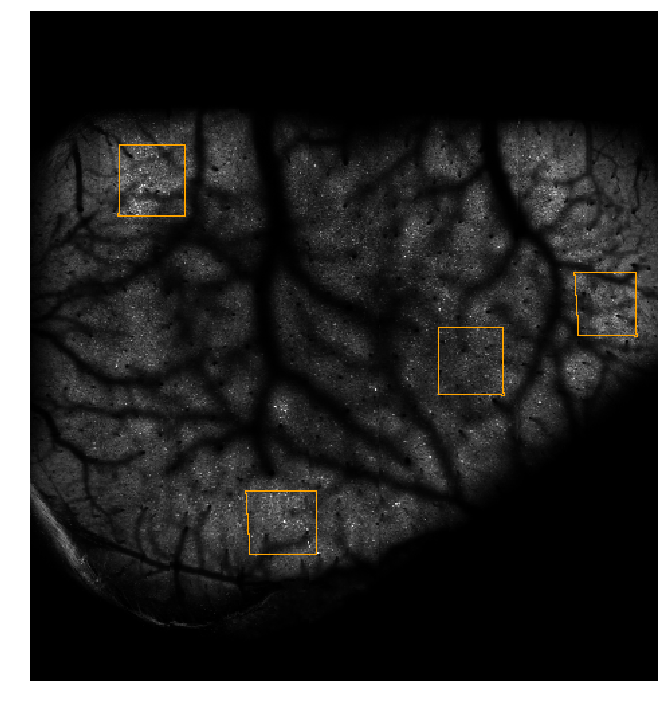

In [7]:
overlay = model.regions.mask(base=(data.mean().toarray()/200).clip(0,1), stroke='orange', fill = None)
image(overlay, size = 12);

Now compute the mean in each one.

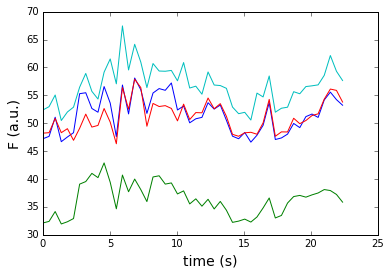

In [8]:
traces = model.transform(data).toarray()
time = [float(x)/2.19 for x in range(traces.shape[1])]
plt.xlabel('time (s)', fontsize=14);
plt.ylabel('F (a.u.)', fontsize=14);
plt.plot(time, traces.T);

## correlate with the average

It won't be particularly informative on this small subset of data, but correlating each pixel's time series with either the time series of another area or neuron, or some behavioral regressor, can be a useful analysis on low magnification data, so we'll show how to do it here.

In [9]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    result = data.uniform_filter(3).toseries().correlate(traces[0]).toimages()

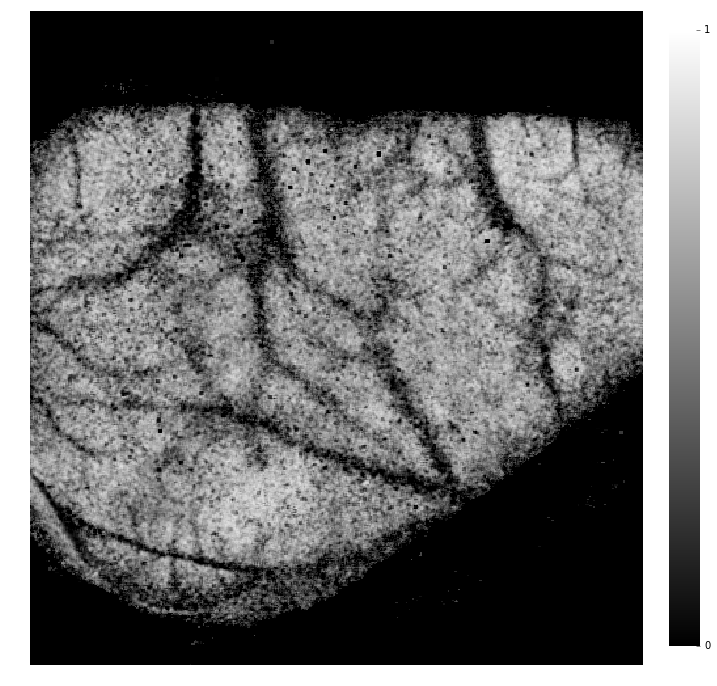

In [10]:
image(result, size=12, clim=(0,1), bar=True);